Fundamnetals of Data Science Project Phase 3

Name: Kimia Mohsenian

Student ID: 97110671

Instructor: Dr. Khalaj

Fall 2022

# Part 0: Importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pickle
from itertools import islice
import seaborn as sns
import string
from string import digits
import re
import emoji
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from nltk.tokenize import word_tokenize
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.metrics import accuracy_score
from string import digits

# Part 1: Loading the dataset, Tweets text processing and Classification using the pre-trained models of ohase 1

### Loading the dataset:

In [4]:
tweets = pd.read_csv('gdrive/MyDrive/DataScience/Project/dataset/tweets.csv')

In [5]:
tweets.head(3)

,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at
0,865326129644797957,RT @cruzfloresiv: To all the weak hands who so...,859451814940336128,0,0,865323140531896320,3005609114,en,"<a href=""http://twitter.com/download/iphone"" r...",Thu May 18 22:00:00 +0000 2017
1,865326133008642049,"Investors Eye Fed, But Bond ETFs Still Add Ass...",44060322,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Thu May 18 22:00:01 +0000 2017
2,865326134262681600,Sell $NLNK (Ne❑wLink Genetics Corporation) tha...,713570637306986496,0,0,0,0,en,"<a href=""https://u.9999yea.rs/bots/"" rel=""nofo...",Thu May 18 22:00:02 +0000 2017


In [6]:
companies = pd.read_csv('gdrive/MyDrive/DataScience/Project/dataset/companies.csv')

In [7]:
companies.head(3)

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06


In [8]:
print('Number of companies: ', len(companies))

Number of companies:  30032


In [9]:
N_tweets =  len(tweets)
print('Number of tweets: ', N_tweets)
N_tweets_new = int(N_tweets/800)
print('Number of tweets in the reduced dataframe: ', N_tweets_new)
tweets_reduced = tweets.sample(n=N_tweets_new,replace=False)
tweets_reduced = tweets_reduced.reset_index()

Number of tweets:  9091539
Number of tweets in the reduced dataframe:  11364


### Cleaning the tweets:

In [10]:
def tweet_cleaner(tweet):
    # removing hashtag signs
    tweet = tweet.replace("#", "").replace("_", " ")
    # removing @ sign
    tweet = re.sub("@[A-Za-z0-9]+","",tweet)
    # removing links                           
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)   
    tweet = " ".join(tweet.split())
    # removing emojis
    tweet = ''.join(c for c in tweet if c not in emoji.EMOJI_DATA)
    # removing captalization
    tweet = tweet.lower().strip()
    # removing numbers
    remove_digits = str.maketrans('', '', digits)
    tweet = tweet.translate(remove_digits)
    # removing punctuation marks
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    return tweet

In [11]:
tweets_reduced['tweet'] = tweets_reduced['text'].map(lambda tweet: tweet_cleaner(tweet))

### Tokenizing:

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
tweets_reduced['tokenized_text'] = tweets_reduced['tweet'].apply(word_tokenize) 

In [14]:
tweets_reduced.head(3)

,index,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,tweet,tokenized_text
0,7883041,902578773345935361,Ray Gerald L &amp; Associates Ltd. Has $6.44 M...,888125801903775744,0,0,0,0,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Aug 29 17:08:43 +0000 2017,ray gerald l amp associates ltd has million p...,"[ray, gerald, l, amp, associates, ltd, has, mi..."
1,6373391,895742603823652864,"CommonWealth: Camping World Holdings, Inc. Ann...",2616445050,0,0,0,0,en,"<a href=""http://www.conferencecalltranscripts....",Thu Aug 10 20:24:13 +0000 2017,commonwealth camping world holdings inc announ...,"[commonwealth, camping, world, holdings, inc, ..."
2,405902,867337628948979717,$GLYC terminates ATM (Expected as doing offering),237591901,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Wed May 24 11:12:59 +0000 2017,glyc terminates atm expected as doing offering,"[glyc, terminates, atm, expected, as, doing, o..."


###  Lemmatization

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
def lemmatize_words(words):
  words = [lemmatizer.lemmatize(word,pos='a') for word in words]
  return words

In [19]:
tweets_reduced['lemma_words'] = tweets_reduced['tokenized_text'].apply(lemmatize_words)

In [20]:
tweets_reduced.head(3)

,index,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,tweet,tokenized_text,lemma_words
0,7883041,902578773345935361,Ray Gerald L &amp; Associates Ltd. Has $6.44 M...,888125801903775744,0,0,0,0,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Aug 29 17:08:43 +0000 2017,ray gerald l amp associates ltd has million p...,"[ray, gerald, l, amp, associates, ltd, has, mi...","[ray, gerald, l, amp, associates, ltd, has, mi..."
1,6373391,895742603823652864,"CommonWealth: Camping World Holdings, Inc. Ann...",2616445050,0,0,0,0,en,"<a href=""http://www.conferencecalltranscripts....",Thu Aug 10 20:24:13 +0000 2017,commonwealth camping world holdings inc announ...,"[commonwealth, camping, world, holdings, inc, ...","[commonwealth, camping, world, holdings, inc, ..."
2,405902,867337628948979717,$GLYC terminates ATM (Expected as doing offering),237591901,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Wed May 24 11:12:59 +0000 2017,glyc terminates atm expected as doing offering,"[glyc, terminates, atm, expected, as, doing, o...","[glyc, terminates, atm, expected, as, doing, o..."


In [21]:
cleaned_tweets = []
for lemma_words in list(tweets_reduced['lemma_words']):
  cleaned_tweets.append(' '.join(lemma_words))
tweets_reduced['cleaned_tweets'] = cleaned_tweets

In [22]:
tweets_reduced.head(3)

,index,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,tweet,tokenized_text,lemma_words,cleaned_tweets
0,7883041,902578773345935361,Ray Gerald L &amp; Associates Ltd. Has $6.44 M...,888125801903775744,0,0,0,0,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Aug 29 17:08:43 +0000 2017,ray gerald l amp associates ltd has million p...,"[ray, gerald, l, amp, associates, ltd, has, mi...","[ray, gerald, l, amp, associates, ltd, has, mi...",ray gerald l amp associates ltd has million po...
1,6373391,895742603823652864,"CommonWealth: Camping World Holdings, Inc. Ann...",2616445050,0,0,0,0,en,"<a href=""http://www.conferencecalltranscripts....",Thu Aug 10 20:24:13 +0000 2017,commonwealth camping world holdings inc announ...,"[commonwealth, camping, world, holdings, inc, ...","[commonwealth, camping, world, holdings, inc, ...",commonwealth camping world holdings inc announ...
2,405902,867337628948979717,$GLYC terminates ATM (Expected as doing offering),237591901,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Wed May 24 11:12:59 +0000 2017,glyc terminates atm expected as doing offering,"[glyc, terminates, atm, expected, as, doing, o...","[glyc, terminates, atm, expected, as, doing, o...",glyc terminates atm expected as doing offering


### Feature Extraction:

BoW:

In [23]:
BoW_FeatureExtractor = CountVectorizer(max_df=0.90, min_df=2, max_features=1500, stop_words='english')

In [24]:
BoW_Features = BoW_FeatureExtractor.fit_transform(tweets_reduced['cleaned_tweets'])

In [25]:
print("Shape of the BoW features: ", np.shape(BoW_Features))

Shape of the BoW features:  (11364, 1500)


TF-IDF:

In [26]:
TFIDF_FeatureExtractor = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1500, stop_words='english')

In [27]:
TFIDF_Features = TFIDF_FeatureExtractor.fit_transform(tweets_reduced['cleaned_tweets'])

In [28]:
print("Shaoe of the TF-IDF features: ", np.shape(TFIDF_Features))

Shaoe of the TF-IDF features:  (11364, 1500)


### Classification:

In this part, I load the two classifiers which were trained in the previous phase of the project, and predict the sentiment labels of tweets of the current dataset using them.

In [29]:
ModelPath1 = 'gdrive/MyDrive/DataScience/Project/classifier_model_bow.sav'
ModelPath2 = 'gdrive/MyDrive/DataScience/Project/classifier_model_tfidf.sav'

In [30]:
classifier_model_bow = pickle.load(open(ModelPath1, 'rb'))
classifier_model_tfidf = pickle.load(open(ModelPath2, 'rb'))

classification with the first model which uses BoW features:

In [31]:
sentiment_labels_BoW = classifier_model_bow.predict(BoW_Features)

In [32]:
tweets_reduced['sentiment_label_BoW'] = sentiment_labels_BoW

classification with the second model which uses TF-IDF features:

In [33]:
sentiment_labels_TFIDF = classifier_model_bow.predict(TFIDF_Features)

Adding the predicted sentiment labels to the dataframe:

In [34]:
tweets_reduced['sentiment_label_TFIDF'] = sentiment_labels_TFIDF

In [35]:
tweets_reduced.head(3)

,index,id,text,user_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_user_id,lang,source,created_at,tweet,tokenized_text,lemma_words,cleaned_tweets,sentiment_label_BoW,sentiment_label_TFIDF
0,7883041,902578773345935361,Ray Gerald L &amp; Associates Ltd. Has $6.44 M...,888125801903775744,0,0,0,0,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Tue Aug 29 17:08:43 +0000 2017,ray gerald l amp associates ltd has million p...,"[ray, gerald, l, amp, associates, ltd, has, mi...","[ray, gerald, l, amp, associates, ltd, has, mi...",ray gerald l amp associates ltd has million po...,0,0
1,6373391,895742603823652864,"CommonWealth: Camping World Holdings, Inc. Ann...",2616445050,0,0,0,0,en,"<a href=""http://www.conferencecalltranscripts....",Thu Aug 10 20:24:13 +0000 2017,commonwealth camping world holdings inc announ...,"[commonwealth, camping, world, holdings, inc, ...","[commonwealth, camping, world, holdings, inc, ...",commonwealth camping world holdings inc announ...,0,4
2,405902,867337628948979717,$GLYC terminates ATM (Expected as doing offering),237591901,0,0,0,0,en,"<a href=""https://about.twitter.com/products/tw...",Wed May 24 11:12:59 +0000 2017,glyc terminates atm expected as doing offering,"[glyc, terminates, atm, expected, as, doing, o...","[glyc, terminates, atm, expected, as, doing, o...",glyc terminates atm expected as doing offering,0,0


I save this dataframe for furthur use:

In [36]:
try:
    file_n = open('gdrive/MyDrive/DataScience/Project/tweets_reduced_Phase_3.csv', 'wb')
    pickle.dump(tweets_reduced, file_n)
    file_n.close()
except:
    print("Something went wrong in saving the doctionary")

# Part 2: Correlation between capitalization of stocks and the sentiments of tweets including them

In this part I do the analaysis for the top mentioned stocks obtained in the first phase of the project, which were:

'RH',  'Jefferies Group LLC',  'Morgan Stanley',  'Piper Jaffray Compan',  'Travelzoo',  'Bank of America Corp',  'Citigroup Inc', 'Oppenheimer Holdings' and 'Bancorp Inc','Raymond James Financ' and 'Ameriprise Financial'

In [37]:
companies.head(3)

,ticker,name,exchange,capitalization
0,A,Agilent Technologies,NYSE,1.915000e+10
1,AA,Alcoa Corp,NYSE,6.480000e+09
2,AAAG,AAA Century Group US,OTCMKTS,9.480000e+06


In [38]:
target_stocks = ['RH', 'Morgan Stanley', 'Piper Jaffray Compan', 'Travelzoo', 'Bank of America Corp', 
                 'Citigroup Inc', 'Oppenheimer Holdings', 'Bancorp Inc', 'Raymond James Financ', 'Ameriprise Financial']

The following dictionary stores top stocks names along with their capitalization:

In [39]:
target_stocks_capitalization = dict.fromkeys(target_stocks, 0) 

In [40]:
for stock in target_stocks:
  target_stocks_capitalization[stock] = companies[companies.name==stock]['capitalization'].iloc[0]

In [41]:
target_stocks_capitalization

{'RH': 2250000000.0,
 'Morgan Stanley': 86360000000.0,
 'Piper Jaffray Compan': 931710000.0,
 'Travelzoo': 149960000.0,
 'Bank of America Corp': 252290000000.0,
 'Citigroup Inc': 192350000000.0,
 'Oppenheimer Holdings': 211220000.0,
 'Bancorp Inc': 427690000.0,
 'Raymond James Financ': 11590000000.0,
 'Ameriprise Financial': 20440000000.0}

The following dictionaries will store the stocks names along with their corresponding average sentiments in tweets:

In [42]:
target_stocks_sentiments_BoW_dict = dict.fromkeys(target_stocks, 0) 
target_stocks_sentiments_TFIDF_dict = dict.fromkeys(target_stocks, 0) 

In [43]:
for stock in target_stocks:
  c = 0
  for i in range(len(tweets_reduced)):
    if stock in tweets_reduced.text[i]:
      c = c+1
      target_stocks_sentiments_BoW_dict[stock] += tweets_reduced.sentiment_label_BoW[i]
      target_stocks_sentiments_TFIDF_dict[stock] += tweets_reduced.sentiment_label_TFIDF[i]
  target_stocks_sentiments_BoW_dict[stock] = target_stocks_sentiments_BoW_dict[stock]/c
  target_stocks_sentiments_TFIDF_dict[stock] = target_stocks_sentiments_TFIDF_dict[stock]/c

plotting:

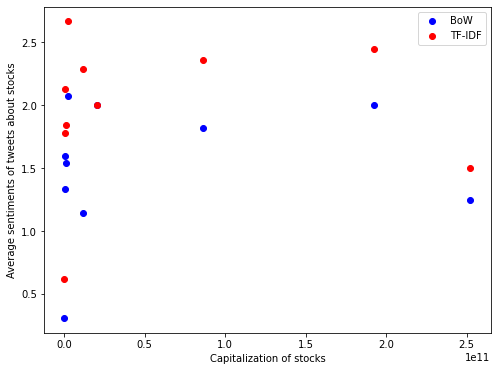

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(list(target_stocks_capitalization.values()), list(target_stocks_sentiments_BoW_dict.values()), c='b', label='BoW')
ax.scatter(list(target_stocks_capitalization.values()), list(target_stocks_sentiments_TFIDF_dict.values()), c='r', label='TF-IDF')
ax.set_xlabel('Capitalization of stocks')
ax.set_ylabel('Average sentiments of tweets about stocks')
ax.legend()
plt.show()

From the above scatter plot, we can conclude that there is no correlation between capitalization of stocks and the average sentiments of tweets including them.

In the following part, I calculate the correlation using Pearson and Spearman correlation metrics.

## Pearson correlation:

In [45]:
PearsonCorr_cap_BoW, _ = pearsonr( list(target_stocks_sentiments_BoW_dict.values()), list(target_stocks_capitalization.values()) )

In [46]:
print('Pearson correlation coefficient between capitalization of stocks and the sentiments of their tweets (with BoW model) is:', PearsonCorr_cap_BoW)

Pearson correlation coefficient between capitalization of stocks and the sentiments of their tweets (with BoW model) is: 0.1442259865690016


In [47]:
PearsonCorr_cap_TFIDF, _ = pearsonr( list(target_stocks_sentiments_TFIDF_dict.values()), list(target_stocks_capitalization.values()) )

In [48]:
print('Pearson correlation coefficient between capitalization of stocks and the sentiments of their tweets (with TF-IDF model) is:', PearsonCorr_cap_TFIDF)

Pearson correlation coefficient between capitalization of stocks and the sentiments of their tweets (with TF-IDF model) is: 0.03273453119368089


### **Conclusion**

From the above results, we can see that there is **no strong linear correlation**  between capitalization of stocks and average sentiments of tweets about them.

## Spearman correlation:

In [49]:
SpearmanCorr_cap_BoW, _ = spearmanr( list(target_stocks_sentiments_BoW_dict.values()), list(target_stocks_capitalization.values()) )

In [50]:
print('Spearman correlation coefficient between capitalization of stocks and the sentiments of their tweets (with BoW model) is:', SpearmanCorr_cap_BoW)

Spearman correlation coefficient between capitalization of stocks and the sentiments of their tweets (with BoW model) is: 0.32218993815043423


In [51]:
SpearmanCorr_cap_TFIDF, _ = spearmanr( list(target_stocks_sentiments_TFIDF_dict.values()), list(target_stocks_capitalization.values()) )

In [52]:
print('Spearman correlation coefficient between capitalization of stocks and the sentiments of their tweets (with TF-IDF model) is:', SpearmanCorr_cap_TFIDF)

Spearman correlation coefficient between capitalization of stocks and the sentiments of their tweets (with TF-IDF model) is: 0.33333333333333326


### **Conclusion**:

There is **no strong nonlinear correlatio**n between capitalization of stocks and average sentiments of tweets about them.

# Part 3-a: Correlation between number of financial tweets and the sentiment of those tweets over time

Like what I did in the first phase of the project, first I create a dictionay which stores tweets IDs along with number of individual stocks mentioned in them:

In [53]:
# converting the data_created column to datetime object
tweets_reduced['created_at'] = pd.to_datetime(tweets_reduced['created_at'])

In [54]:
# sorting the dataframe by its creation time
tweets_reduced = tweets_reduced.sort_values(by='created_at')
tweets_reduced = tweets_reduced.reset_index()

In [55]:
tweets_Nstock = dict.fromkeys(tweets_reduced['id'], 0) 

In [56]:
for i in range(len(tweets_reduced)):
  tweet = tweets_reduced['text'][i]
  tweet.replace(r'(', '')
  tweet.replace(r')', '')
  id = tweets_reduced['id'][i]
  for stock in companies['name']:
    if stock in tweet:
      tweets_Nstock[id] += 1

In [57]:
# sorting
tweets_Nstock = dict(sorted(tweets_Nstock.items(), key=lambda item: item[1], reverse=True))

I save this dictionaty for furthure use:

In [58]:
try:
    file_dict = open('gdrive/MyDrive/DataScience/Project/tweets_Nstock_Phase_3', 'wb')
    pickle.dump(tweets_Nstock, file_dict)
    file_dict.close()
except:
    print("Something went wrong in saving the doctionary")

Loading the dictionay:

In [59]:
with open('gdrive/MyDrive/DataScience/Project/tweets_Nstock_Phase_3', 'rb') as f:
    tweets_Nstock = pickle.load(f)

Now, I will extract those tweets which include at least one stock name:

In [60]:
desired_IDs = [k for k,v in tweets_Nstock.items() if v>=1]
Numstock_desired_IDs = [v for k,v in tweets_Nstock.items() if v>=1]

In [61]:
print('Number of tweets which include at least 1 individual stock: ', len(desired_IDs))

Number of tweets which include at least 1 individual stock:  2737


creating a new dataframe with these tweets and their creation time:

In [62]:
desired_created_at = []
desired_bow_label = []
desired_tfidf_label = []
for i in range(len(desired_IDs)):
  desired_created_at.append( (tweets_reduced.loc[tweets_reduced['id'] == desired_IDs[i], 'created_at']).iloc[0] )
  desired_bow_label.append( (tweets_reduced.loc[tweets_reduced['id'] == desired_IDs[i], 'sentiment_label_BoW']).iloc[0] )
  desired_tfidf_label.append( (tweets_reduced.loc[tweets_reduced['id'] == desired_IDs[i], 'sentiment_label_TFIDF']).iloc[0] )

In [63]:
desired_IDs_dataframe = pd.DataFrame()
desired_IDs_dataframe['id'] = desired_IDs
desired_IDs_dataframe['Number_of_individual_stocks_included'] = Numstock_desired_IDs
desired_IDs_dataframe['created_at'] = desired_created_at
desired_IDs_dataframe['sentiment_label_BoW'] = desired_bow_label
desired_IDs_dataframe['sentiment_label_TFIDF'] = desired_tfidf_label
desired_IDs_dataframe['n'] = [1]*len(desired_created_at)

In [64]:
desired_IDs_dataframe.head(3)

,id,Number_of_individual_stocks_included,created_at,sentiment_label_BoW,sentiment_label_TFIDF,n
0,875726298718535680,9,2017-06-16 14:46:34+00:00,4,4,1
1,867213089162317824,7,2017-05-24 02:58:07+00:00,4,4,1
2,868240161133481984,7,2017-05-26 22:59:20+00:00,4,4,1


In [65]:
desired_IDs_dataframe.tail(3)

,id,Number_of_individual_stocks_included,created_at,sentiment_label_BoW,sentiment_label_TFIDF,n
2734,907702469182070786,1,2017-09-12 20:28:27+00:00,0,0,1
2735,907709838796492802,1,2017-09-12 20:57:44+00:00,0,0,1
2736,907716130873253888,1,2017-09-12 21:22:44+00:00,0,0,1


I save this dataframe for furthur use:

In [66]:
try:
    file_n = open('gdrive/MyDrive/DataScience/Project/tweets_Nstocks_Phase_3.csv', 'wb')
    pickle.dump(desired_IDs_dataframe, file_n)
    file_n.close()
except:
    print("Something went wrong in saving the doctionary")

### Distribution of tweets including at least one stock per Day:

In [67]:
NumDaily_tweets = desired_IDs_dataframe.groupby(pd.PeriodIndex(desired_IDs_dataframe['created_at'], freq="D"))['n'].sum().reset_index()

In [68]:
NumDaily_tweets.head(3)

,created_at,n
0,2017-05-18,1
1,2017-05-19,38
2,2017-05-20,22


Saving this dataframe for furthure use:

In [69]:
try:
    file_n = open('gdrive/MyDrive/DataScience/Project/Nstocks_Daily_tweets_Phase_3.csv', 'wb')
    pickle.dump(NumDaily_tweets, file_n)
    file_n.close()
except:
    print("Something went wrong in saving the doctionary")

### Distribution of sentiments of tweets (using BoW labels) per Day:

In [70]:
SentimentDaily_tweets_BoW = desired_IDs_dataframe.groupby(pd.PeriodIndex(desired_IDs_dataframe['created_at'], freq="D"))['sentiment_label_BoW'].mean().reset_index()

In [71]:
SentimentDaily_tweets_BoW.head(3)

,created_at,sentiment_label_BoW
0,2017-05-18,4.000000
1,2017-05-19,1.263158
2,2017-05-20,1.454545


Saving this dataframe for furthure use:

In [72]:
try:
    file_n = open('gdrive/MyDrive/DataScience/Project/BoWSentiment_Daily_tweets_Phase_3.csv', 'wb')
    pickle.dump(SentimentDaily_tweets_BoW, file_n)
    file_n.close()
except:
    print("Something went wrong in saving the doctionary")

### Distribution of sentiments of tweets (using TFIDF labels) per day:

In [73]:
SentimentDaily_tweets_TFIDF = desired_IDs_dataframe.groupby(pd.PeriodIndex(desired_IDs_dataframe['created_at'], freq="D"))['sentiment_label_TFIDF'].mean().reset_index()

In [74]:
#SentimentDaily_tweets_TFIDF['sentiment_label_TFIDF'] = SentimentDaily_tweets_TFIDF['sentiment_label_TFIDF'].map(lambda label: label_detector(label))

In [75]:
SentimentDaily_tweets_TFIDF.head(3)

,created_at,sentiment_label_TFIDF
0,2017-05-18,4.000000
1,2017-05-19,1.684211
2,2017-05-20,1.818182


Saving this dataframe for furthure use:

In [76]:
try:
    file_n = open('gdrive/MyDrive/DataScience/Project/BoWSentiment_Daily_tweets_Phase_3.csv', 'wb')
    pickle.dump(SentimentDaily_tweets_TFIDF, file_n)
    file_n.close()
except:
    print("Something went wrong in saving the doctionary")

scatter plot:

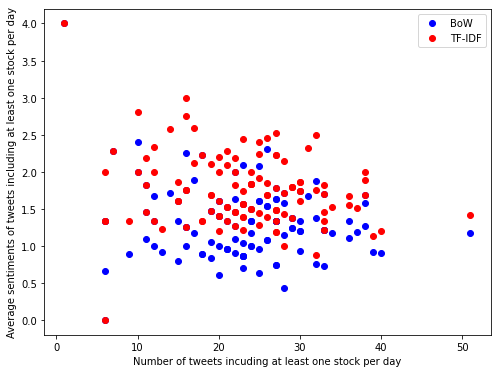

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(NumDaily_tweets.n, SentimentDaily_tweets_BoW.sentiment_label_BoW, c='b', label='BoW')
ax.scatter(NumDaily_tweets.n, SentimentDaily_tweets_TFIDF.sentiment_label_TFIDF, c='r', label='TF-IDF')
ax.set_xlabel('Number of tweets incuding at least one stock per day')
ax.set_ylabel('Average sentiments of tweets including at least one stock per day')
ax.legend()
plt.show()

Frome the above graph we see that there is no correlation between number of tweets which contain stocks names over time, and their sentiments over time.
In the following part, I calculate the correlation between these two vairiables using the dataframes obtained in the last part and Pearson and Spearman coefficients as correlation metrics:

### Pearson Correlation Coefficient :

In [78]:
from scipy.stats import pearsonr

With BoW model results:

In [79]:
PearsonCorr_BoW, _ = pearsonr(NumDaily_tweets.n, SentimentDaily_tweets_BoW.sentiment_label_BoW)

In [80]:
print('Pearson correlation coefficient between number of stocks per day and the sentiments per day using BoW feature model is: ', PearsonCorr_BoW)

Pearson correlation coefficient between number of stocks per day and the sentiments per day using BoW feature model is:  -0.17663615213563053


With TF-IDF results:

In [81]:
PearsonCorr_TFIDF, _ = pearsonr(NumDaily_tweets.n, SentimentDaily_tweets_TFIDF.sentiment_label_TFIDF)

In [82]:
print('Pearson correlation coefficient between number of stocks per day and the sentiments per day using TF-IDF feature model is: ', PearsonCorr_TFIDF)

Pearson correlation coefficient between number of stocks per day and the sentiments per day using TF-IDF feature model is:  -0.20583736193071323


### **Conclusion:**

Based on the above finding, we can conclude that there is **no linear** **correlation** between number of financial tweets per day and sentiments of those tweets per day.

## Spearman’s Correlation Coefficient:

With BoW model results:

In [83]:
from scipy.stats import spearmanr

In [84]:
SpearmanrCorr_BoW, _ = spearmanr(NumDaily_tweets.n, SentimentDaily_tweets_BoW.sentiment_label_BoW)

In [85]:
print('Spearman correlation coefficient between number of stocks per day and the sentiments per day using BoW feature model is: ', SpearmanrCorr_BoW)

Spearman correlation coefficient between number of stocks per day and the sentiments per day using BoW feature model is:  -0.0648402836024052


With TF-IDF model results:

In [86]:
SpearmanrCorr_TFIDF, _ = spearmanr(NumDaily_tweets.n, SentimentDaily_tweets_TFIDF.sentiment_label_TFIDF)

In [87]:
print('Spearman correlation coefficient between number of stocks per day and the sentiments per day using TF-IDF feature model is: ', SpearmanrCorr_TFIDF)

Spearman correlation coefficient between number of stocks per day and the sentiments per day using TF-IDF feature model is:  -0.1377051146146205


### **Conclusion:**

Based on the above findings, we can conclude that there is **no strong nonlinear** **correlation** between number of financial tweets per day and sentiments of tweets per day.

# Part 3-b: Another view: Correlation between number tweets about **Jefferies Group LLC** and the sentiment of those tweets over time

In this part I try a differnt approach. I analyze the correlation between number of times the **Jefferies Group LLC** is mentioned in tweets over time, and the sentiments of those tweets over time.

In [88]:
tweets_IDs2 = []                 # IDs of tweets containing "Jefferies Group LLC" in them
tweets_created_at2 = []          # creation time of tweets containing "Jefferies Group LLC" in them
tweets_sentiment_label_BoW2 = []
tweets_sentiment_label_TFIDF2 = []

for i in range(len(tweets_reduced)):
  if ("Morgan Stanley" in tweets_reduced.text[i]):
    tweets_IDs2.append(tweets_reduced.id[i])
    tweets_created_at2.append(tweets_reduced.created_at[i])
    tweets_sentiment_label_BoW2.append(tweets_reduced.sentiment_label_BoW[i])
    tweets_sentiment_label_TFIDF2.append(tweets_reduced.sentiment_label_TFIDF[i])

creating a dataframe with these tweets:

In [89]:
Morgan_Stanley_tweets_dataframe = pd.DataFrame()
Morgan_Stanley_tweets_dataframe['id'] = tweets_IDs2
Morgan_Stanley_tweets_dataframe['created_at'] = tweets_created_at2
Morgan_Stanley_tweets_dataframe['tweets_sentiment_label_BoW'] = tweets_sentiment_label_BoW2
Morgan_Stanley_tweets_dataframe['tweets_sentiment_label_TFIDF'] = tweets_sentiment_label_TFIDF2
Morgan_Stanley_tweets_dataframe['n'] = [1]*len(tweets_IDs2)

In [90]:
Morgan_Stanley_tweets_dataframe.head(3)

,id,created_at,tweets_sentiment_label_BoW,tweets_sentiment_label_TFIDF,n
0,866661030314864641,2017-05-22 14:24:26+00:00,0,4,1
1,868043169929277440,2017-05-26 09:56:33+00:00,0,0,1
2,869156959995514880,2017-05-29 11:42:22+00:00,4,4,1


### Distribution of number of tweets including "Jefferies_Group LLC" per week:

In [91]:
NumWeekly_tweets_Morgan_Stanley = Morgan_Stanley_tweets_dataframe.groupby(pd.PeriodIndex(Morgan_Stanley_tweets_dataframe['created_at'], freq="W"))['n'].sum().reset_index()

In [92]:
NumWeekly_tweets_Morgan_Stanley.head(5)

,created_at,n
0,2017-05-22/2017-05-28,2
1,2017-05-29/2017-06-04,1
2,2017-06-12/2017-06-18,1
3,2017-06-19/2017-06-25,2
4,2017-06-26/2017-07-02,2


### Distribution of sentiments of tweets including "Jefferies_Group LLC" per week:

BoW

In [93]:
SentimentWeekly_tweets_BoW = Morgan_Stanley_tweets_dataframe.groupby(pd.PeriodIndex(Morgan_Stanley_tweets_dataframe['created_at'], freq="W"))['tweets_sentiment_label_BoW'].mean().reset_index()

TF-IDF

In [94]:
SentimentWeekly_tweets_TFIDF = Morgan_Stanley_tweets_dataframe.groupby(pd.PeriodIndex(Morgan_Stanley_tweets_dataframe['created_at'], freq="W"))['tweets_sentiment_label_TFIDF'].mean().reset_index()

plotting:

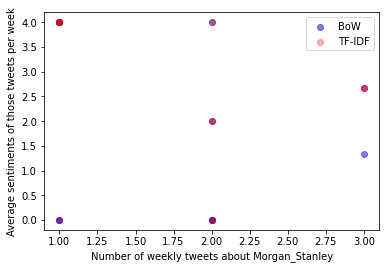

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(NumWeekly_tweets_Morgan_Stanley.n, SentimentWeekly_tweets_BoW.tweets_sentiment_label_BoW, c='b', alpha=0.5, label='BoW')
ax.scatter(NumWeekly_tweets_Morgan_Stanley.n, SentimentWeekly_tweets_TFIDF.tweets_sentiment_label_TFIDF, c='r',alpha=0.3,  label='TF-IDF')
ax.set_xlabel('Number of weekly tweets about Morgan_Stanley')
ax.set_ylabel('Average sentiments of those tweets per week')
ax.legend()
plt.show()

No correlation can be seen in the above figure.

### Pearson Correlation Coefficient :

With BoW model results:

In [96]:
PearsonCorr_BoW_Morgan_Stanley, _ = pearsonr(NumWeekly_tweets_Morgan_Stanley.n, SentimentWeekly_tweets_BoW.tweets_sentiment_label_BoW)

In [97]:
print('Pearson correlation coefficient between number of tweets about Jefferies_Group per day and their sentiments per day using BoW feature model is: ', PearsonCorr_BoW_Morgan_Stanley)

Pearson correlation coefficient between number of tweets about Jefferies_Group per day and their sentiments per day using BoW feature model is:  -0.2404294576599797


With TF-IDF results:

In [98]:
PearsonCorr_TFIDF_Morgan, _ = pearsonr(NumWeekly_tweets_Morgan_Stanley.n, SentimentWeekly_tweets_TFIDF.tweets_sentiment_label_TFIDF)

In [99]:
print('Pearson correlation coefficient between number of tweets about Jefferies_Group per day and their sentiments per day using TFIDF feature model is: ', PearsonCorr_TFIDF_Morgan)

Pearson correlation coefficient between number of tweets about Jefferies_Group per day and their sentiments per day using TFIDF feature model is:  -0.2961927068097396


### **Conclusion:**

Based on the above findings, we can conclude that there is **no linear** **correlation** between number of tweets about Jefferies Group per day and sentiments of those tweets per day.

## Spearman’s Correlation Coefficient:

With BoW model results:

In [100]:
SpearmanrCorr_BoW_Morgan_Stanley, _ = spearmanr(NumWeekly_tweets_Morgan_Stanley.n, SentimentWeekly_tweets_BoW.tweets_sentiment_label_BoW)

In [101]:
print('Spearman correlation coefficient between number of tweets about Jefferies_Group per day and their sentiments per day using BoW feature model is: ', SpearmanrCorr_BoW_Morgan_Stanley)

Spearman correlation coefficient between number of tweets about Jefferies_Group per day and their sentiments per day using BoW feature model is:  -0.2785702980124483


With TF-IDF model results:

In [102]:
SpearmanrCorr_TFIDF_Morgan_Stanley, _ = spearmanr(NumWeekly_tweets_Morgan_Stanley.n, SentimentWeekly_tweets_TFIDF.tweets_sentiment_label_TFIDF)

In [103]:
print('Spearman correlation coefficient between number of tweets about Jefferies_Group per day and their sentiments per day using TF-IDF feature model is: ', SpearmanrCorr_TFIDF_Morgan_Stanley)

Spearman correlation coefficient between number of tweets about Jefferies_Group per day and their sentiments per day using TF-IDF feature model is:  -0.45813263279056476


### **Conclusion:**

Based on the above findings, we can conclude that there is **no nonlinear** **correlation** between number of tweets about Jefferies Group per day and sentiments of those tweets per day.

# Part 4: Comparing classifiers results

In the previous parts, I got almost similar results about correlations with both classifiers. (one of the classifiers used BoW features and the other one used TF-IDF features)

# Part 5: About transfer learning in this project

As you could observe, I didn't train a new classifier on the tweets of this dataset; instead, I predicted the sentiment labels of this dataset using the classifiers which were trained in the first phase of the project. This is how transfer learning was used in this project.

We should note that fine tuning was not done, because no labels were available for sentiments of this dataset. In fact, if we had even a small amounts of labels for this dataset, we could fine tune the pre-trained classifiers on this dataset and obtain better results.